In [4]:
import pandas as pd
import os
import numpy as np

# open data/scraped_news.csv
df = pd.read_csv(os.path.join('data', 'scraped_news.csv'))

df.head()

,title,description,url,published_date,source
0,Trump’s Abuse of Recount Funds Shows the Need ...,Trump’s Abuse of Recount Funds Shows the Need ...,https://news.google.com/rss/articles/CBMikgFBV...,"Tue, 31 Jan 2023 08:00:00 GMT","{'href': 'https://campaignlegal.org', 'title':..."
1,Trump criticizes federal response to Ohio trai...,Trump criticizes federal response to Ohio trai...,https://news.google.com/rss/articles/CBMiugFBV...,"Wed, 22 Feb 2023 08:00:00 GMT","{'href': 'https://apnews.com', 'title': 'AP Ne..."
2,Fani Willis is likely going to indict Trump so...,Fani Willis is likely going to indict Trump so...,https://news.google.com/rss/articles/CBMi1gFBV...,"Mon, 30 Jan 2023 08:00:00 GMT","{'href': 'https://www.citizensforethics.org', ..."
3,"Trump, after reported subpoena, defends keepin...","Trump, after reported subpoena, defends keepin...",https://news.google.com/rss/articles/CBMirgFBV...,"Tue, 14 Feb 2023 08:00:00 GMT","{'href': 'https://www.reuters.com', 'title': '..."
4,Trump vows to 'stop' gender-affirming care for...,Trump vows to 'stop' gender-affirming care for...,https://news.google.com/rss/articles/CBMivwFBV...,"Tue, 31 Jan 2023 08:00:00 GMT","{'href': 'https://www.nbcnews.com', 'title': '..."


In [5]:
# load publised_date column, convert to datetime
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')

# count the number of articles per month
df['month'] = df['published_date'].dt.to_period('M')
articles_per_month = df['month'].value_counts().sort_index()
print(articles_per_month)

month
2023-01     30
2023-02     70
2023-03     31
2023-04     69
2023-05      5
2023-06     95
2023-07     18
2023-08     82
2023-09     39
2023-10     61
2023-11     43
2023-12     57
2024-01     50
2024-02     47
2024-03     42
2024-04     61
2024-05     50
2024-06     50
2024-07     66
2024-08     34
2024-09     46
2024-10     54
2024-11     82
2024-12     18
2025-01    100
2025-02    100
2025-03    100
Freq: M, Name: count, dtype: int64


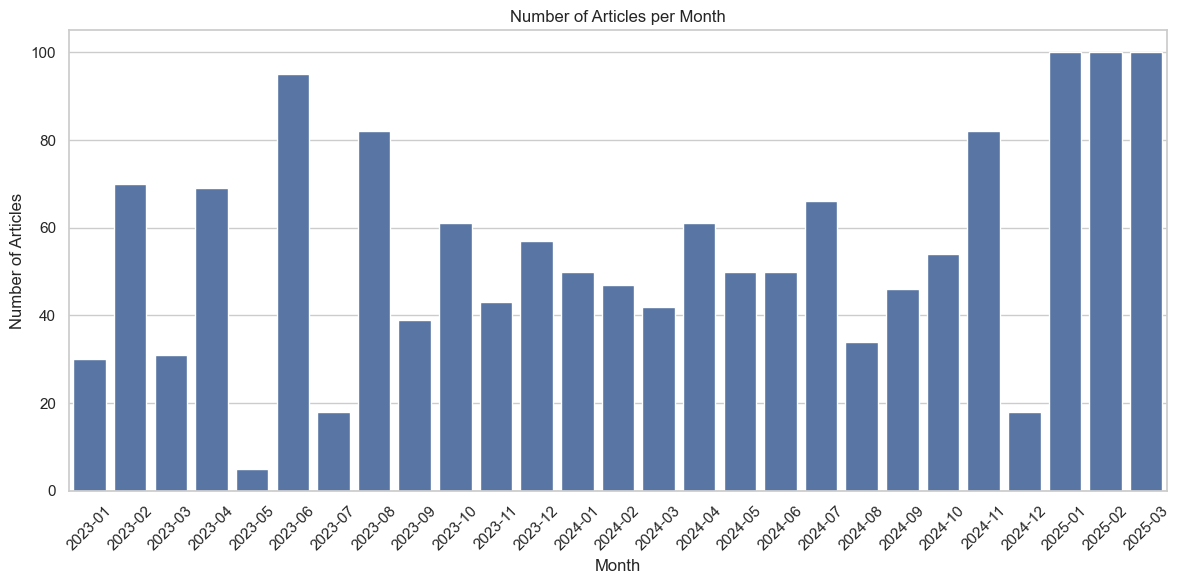

In [6]:
# Plot articles per month distribution
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x=articles_per_month.index.astype(str), y=articles_per_month.values)
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.title('Number of Articles per Month')
plt.tight_layout()
plt.savefig(os.path.join('images', 'articles_per_month.png'))
plt.show()

In [7]:
from textblob import TextBlob
from nltk.corpus import stopwords

In [8]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# df['title_sentiment'] = df['title'].apply(get_sentiment)
df['description_sentiment'] = df['description'].apply(get_sentiment)

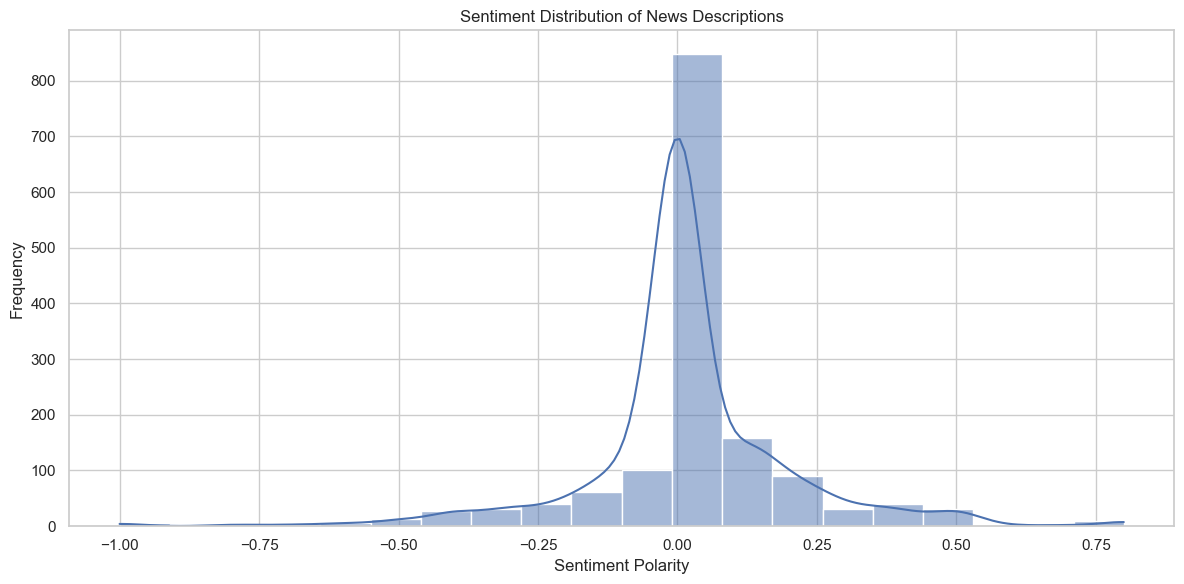

In [9]:
def plot_sentiment_distribution(df, column, title):
    plt.figure(figsize=(12, 6))
    sns.histplot(df[column], bins=20, kde=True)
    plt.xlabel('Sentiment Polarity')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.tight_layout()
    plt.savefig(os.path.join('images', f'{column}_sentiment_distribution.png'))
    plt.show()

plot_sentiment_distribution(df, 'description_sentiment', 'Sentiment Distribution of News Descriptions')

In [10]:
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/robertoeg/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [11]:
# initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()
# define a function to get the sentiment of a text
def get_sentiment(text):
    # get the sentiment polarity
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    # get the sentiment score
    sentiment_score = sia.polarity_scores(text)
    return sentiment, sentiment_score['compound']

# apply the function to the text column
df['sentiment'], df['sentiment_score'] = zip(*df['description'].apply(get_sentiment))

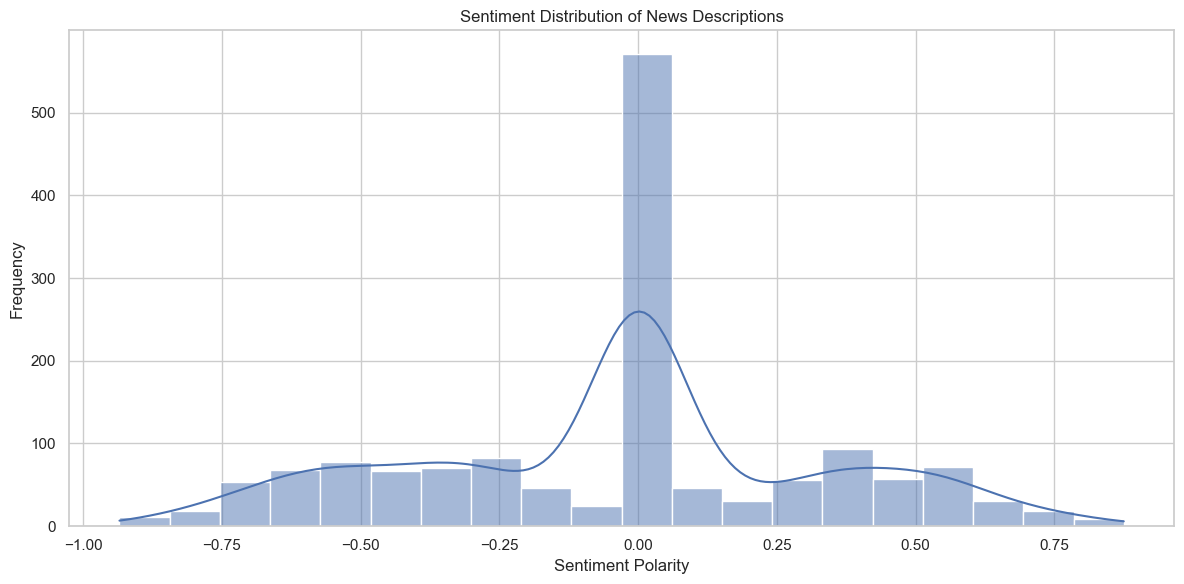

In [12]:
# plot sentiment distribution
def plot_sentiment_distribution(df, column, title):
    plt.figure(figsize=(12, 6))
    sns.histplot(df[column], bins=20, kde=True)
    plt.xlabel('Sentiment Polarity')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.tight_layout()
    plt.savefig(os.path.join('images', f'{column}_sentiment_distribution.png'))
    plt.show()

plot_sentiment_distribution(df, 'sentiment_score', 'Sentiment Distribution of News Descriptions')

In [13]:
df.head()

,title,description,url,published_date,source,month,description_sentiment,sentiment,sentiment_score
0,Trump’s Abuse of Recount Funds Shows the Need ...,Trump’s Abuse of Recount Funds Shows the Need ...,https://news.google.com/rss/articles/CBMikgFBV...,2023-01-31 08:00:00,"{'href': 'https://campaignlegal.org', 'title':...",2023-01,0.066667,0.066667,-0.2732
1,Trump criticizes federal response to Ohio trai...,Trump criticizes federal response to Ohio trai...,https://news.google.com/rss/articles/CBMiugFBV...,2023-02-22 08:00:00,"{'href': 'https://apnews.com', 'title': 'AP Ne...",2023-02,0.000000,0.000000,-0.3400
2,Fani Willis is likely going to indict Trump so...,Fani Willis is likely going to indict Trump so...,https://news.google.com/rss/articles/CBMi1gFBV...,2023-01-30 08:00:00,"{'href': 'https://www.citizensforethics.org', ...",2023-01,0.000000,0.000000,0.3612
3,"Trump, after reported subpoena, defends keepin...","Trump, after reported subpoena, defends keepin...",https://news.google.com/rss/articles/CBMirgFBV...,2023-02-14 08:00:00,"{'href': 'https://www.reuters.com', 'title': '...",2023-02,0.000000,0.000000,0.0000
4,Trump vows to 'stop' gender-affirming care for...,Trump vows to 'stop' gender-affirming care for...,https://news.google.com/rss/articles/CBMivwFBV...,2023-01-31 08:00:00,"{'href': 'https://www.nbcnews.com', 'title': '...",2023-01,0.000000,0.000000,0.4939


In [14]:
import ast

# Convert the string to dict and extract 'title'
df['news_source'] = df['source'].apply(lambda x: ast.literal_eval(x)['title'])

df.head()

,title,description,url,published_date,source,month,description_sentiment,sentiment,sentiment_score,news_source
0,Trump’s Abuse of Recount Funds Shows the Need ...,Trump’s Abuse of Recount Funds Shows the Need ...,https://news.google.com/rss/articles/CBMikgFBV...,2023-01-31 08:00:00,"{'href': 'https://campaignlegal.org', 'title':...",2023-01,0.066667,0.066667,-0.2732,Campaign Legal Center
1,Trump criticizes federal response to Ohio trai...,Trump criticizes federal response to Ohio trai...,https://news.google.com/rss/articles/CBMiugFBV...,2023-02-22 08:00:00,"{'href': 'https://apnews.com', 'title': 'AP Ne...",2023-02,0.000000,0.000000,-0.3400,AP News
2,Fani Willis is likely going to indict Trump so...,Fani Willis is likely going to indict Trump so...,https://news.google.com/rss/articles/CBMi1gFBV...,2023-01-30 08:00:00,"{'href': 'https://www.citizensforethics.org', ...",2023-01,0.000000,0.000000,0.3612,Citizens for Responsibility and Ethics in Wash...
3,"Trump, after reported subpoena, defends keepin...","Trump, after reported subpoena, defends keepin...",https://news.google.com/rss/articles/CBMirgFBV...,2023-02-14 08:00:00,"{'href': 'https://www.reuters.com', 'title': '...",2023-02,0.000000,0.000000,0.0000,Reuters
4,Trump vows to 'stop' gender-affirming care for...,Trump vows to 'stop' gender-affirming care for...,https://news.google.com/rss/articles/CBMivwFBV...,2023-01-31 08:00:00,"{'href': 'https://www.nbcnews.com', 'title': '...",2023-01,0.000000,0.000000,0.4939,NBC News


In [23]:
# Create a new DataFrame with 'published_date' and 'sentiment_score' columns
new_df = df[['published_date', 'sentiment_score']].copy()

# Convert 'published_date' to datetime format 
new_df['published_date'] = pd.to_datetime(new_df['published_date'], format='%Y-%m-%d')

# save the new DataFrame to a CSV file
new_df.to_csv('sentiment_scores.csv', index=False)

# Display the new DataFrame
new_df.head()

,published_date,sentiment_score
0,2023-01-31 08:00:00,-0.2732
1,2023-02-22 08:00:00,-0.3400
2,2023-01-30 08:00:00,0.3612
3,2023-02-14 08:00:00,0.0000
4,2023-01-31 08:00:00,0.4939
